In [1]:
# Cell 1: Imports and Setup
# ---------------------------
# Description:
# This cell imports the necessary Python libraries for data manipulation (pandas, numpy)
# and visualization (matplotlib, seaborn). We also set some display and plotting
# styles for a professional and readable report aesthetic.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style for the plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported and plotting style set.")

Libraries imported and plotting style set.


In [5]:
# Cell 2: Data Loading
# --------------------
# Description:
# This cell loads the dataset from a CSV file. It's crucial that the data is loaded
# correctly before any analysis can begin. The function includes a placeholder
# for demonstration purposes; you must replace it with your actual data loading command.

def load_airfoil_data(filepath):
    """
    Loads the airfoil data from the specified Parquet file.
    """
    print(f"Attempting to load data from: {filepath}")
    try:
        df = pd.read_parquet(filepath)  # Changed from read_csv to read_parquet
        print(f"Successfully loaded data from {filepath}")
        return df

    except FileNotFoundError:
        print(f"ERROR: Data file not found at '{filepath}'. Please check the path and filename.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# --- Configuration ---
DATA_FILEPATH = 'airfoil_polars.parquet' # !!! UPDATE THIS PATH !!!

# --- Load the data ---
df = pd.read_parquet(DATA_FILEPATH)

if df is None:
    print("\nData could not be loaded. Please check the file path and integrity.")
else:
    print("\nData loaded successfully.")


Data loaded successfully.


In [6]:
# Cell 3: Part 1 - Initial Data Health Check & Overview
# -----------------------------------------------------
# Description:
# The first step in any EDA is to perform a health check on the dataset.
# We will verify the data types, check for missing values, and get a high-level
# statistical summary. This ensures the data is clean and provides a foundational
# understanding of its contents for the report.

if df is not None:
    print("======================================================")
    print("=== Part 1: Initial Data Health Check & Overview ===")
    print("======================================================")

    # 1.1 Data Structure and Types
    print("\n--- 1.1 Data Structure and Types (`.info()`) ---\n")
    print("This summary shows the number of rows, column names, non-null counts, and data types.")
    print("It's a quick check for missing data and confirms that columns are correctly formatted (e.g., numbers as floats).")
    df.info()

    # 1.2 Descriptive Statistics
    print("\n\n--- 1.2 Descriptive Statistics (`.describe()`) ---\n")
    print("This table provides key statistics for all numerical columns, giving a sense of the range and distribution of each parameter.")
    # Display with 4 decimal places for better readability
    display(df.describe().round(4))

    # 1.3 Missing Values Check
    print("\n\n--- 1.3 Missing Values Check (`.isnull().sum()`) ---\n")
    print("This confirms the data integrity by explicitly counting any missing values per column.")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found.")

else:
    print("DataFrame not loaded. Skipping Part 1.")

=== Part 1: Initial Data Health Check & Overview ===

--- 1.1 Data Structure and Types (`.info()`) ---

This summary shows the number of rows, column names, non-null counts, and data types.
It's a quick check for missing data and confirms that columns are correctly formatted (e.g., numbers as floats).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117740 entries, 0 to 117739
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   alpha          117740 non-null  float64
 1   CL             117740 non-null  float64
 2   CD             117740 non-null  float64
 3   CDp            117740 non-null  float64
 4   CM             117740 non-null  float64
 5   Top_Xtr        117740 non-null  float64
 6   Bot_Xtr        117740 non-null  float64
 7   airfoil        117740 non-null  object 
 8   Re             117740 non-null  float64
 9   max_thickness  117740 non-null  float64
 10  x_thickness    117740 non-null  float64
 

,alpha,CL,CD,CDp,CM,Top_Xtr,Bot_Xtr,Re,max_thickness,x_thickness,max_camber,x_camber,le_radius
count,117740.0000,117740.0000,117740.0000,117740.0000,117740.0000,117740.0000,117740.0000,117740.0000,117740.0000,117740.0000,117740.0000,117740.0000,117740.0000
mean,2.9996,0.5808,0.0192,0.0119,-0.0415,0.5055,0.8150,201296.9254,0.0763,0.2706,0.0323,0.2642,0.0486
std,2.9547,0.4031,0.0103,0.0100,0.0484,0.1986,0.2414,81266.2321,0.0248,0.0913,0.0142,0.1128,0.0132
min,-2.0000,-0.4251,0.0051,-0.0040,-0.2604,0.0479,0.0633,100000.0000,0.0239,0.0303,0.0056,0.0000,0.0257
25%,0.5000,0.2683,0.0133,0.0064,-0.0690,0.3600,0.7108,100000.0000,0.0580,0.2323,0.0199,0.2222,0.0377
50%,3.0000,0.6047,0.0169,0.0095,-0.0287,0.4914,0.9202,200000.0000,0.0767,0.3030,0.0325,0.3030,0.0473
75%,5.5000,0.8917,0.0224,0.0144,-0.0033,0.6508,1.0000,300000.0000,0.0950,0.3030,0.0426,0.3030,0.0588
max,8.0000,1.8013,0.1562,0.1474,0.0781,1.0000,1.0001,300000.0000,0.1338,0.5960,0.0600,0.8081,0.1034




--- 1.3 Missing Values Check (`.isnull().sum()`) ---

This confirms the data integrity by explicitly counting any missing values per column.
No missing values found.



=== Part 2: Understanding the Input Parameter Space ===

--- 2.1 Distribution of Geometric Features (for N=1000 unique airfoils) ---

To understand the geometric diversity, we look at the distribution of features for each unique airfoil.
This shows our randomly generated shapes cover a wide and varied design space, which is a key strength.


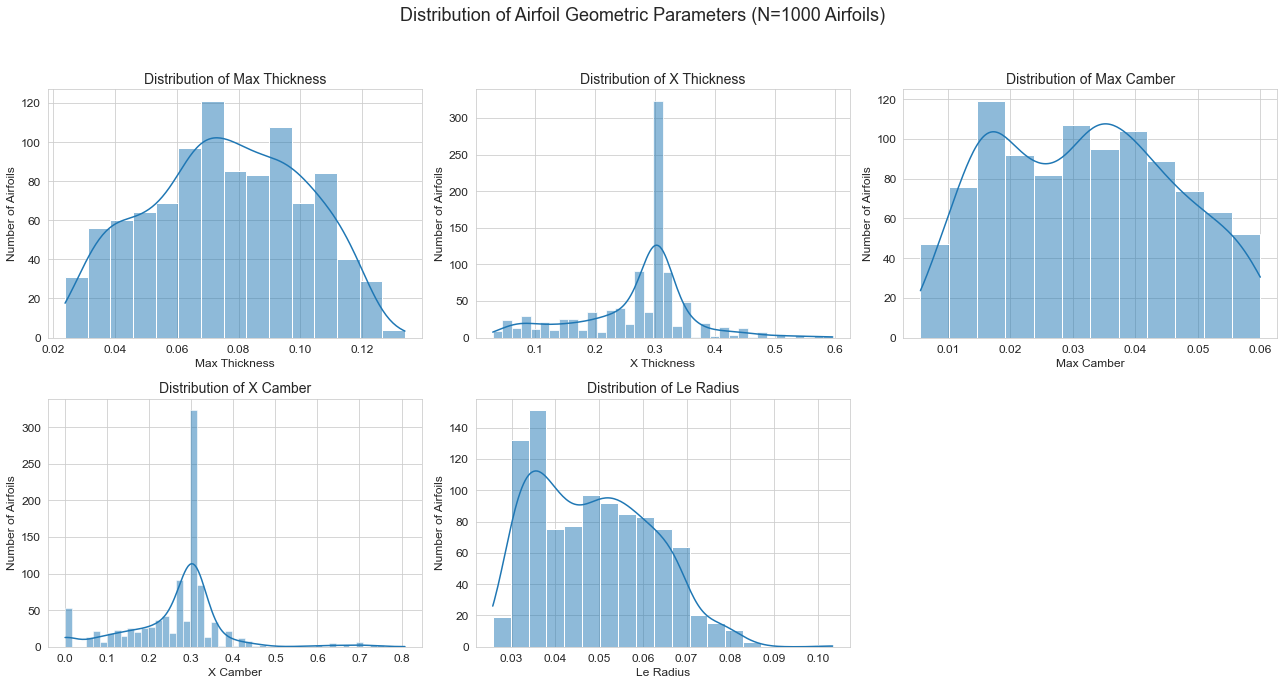



--- 2.2 Distribution of Operational Parameters ---

These plots show the range of angles of attack and the balance of data across different Reynolds number regimes.


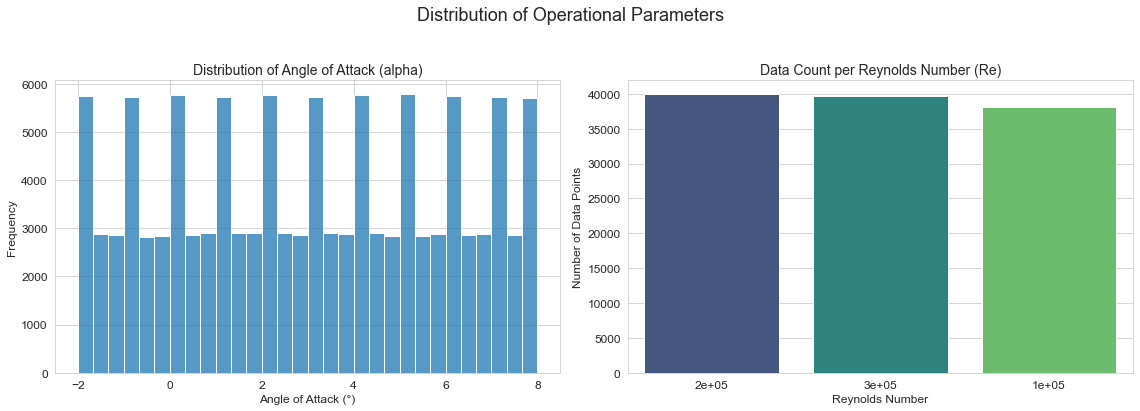

In [8]:
# Cell 4: Part 2 - Understanding the Input Parameter Space
# ---------------------------------------------------------
# Description:
# These plots visualize the scope of our study. They answer the question:
# "What kinds of airfoils and operating conditions were investigated?"
# This is crucial for defining the domain of applicability for our final model.

if df is not None:
    print("\n==========================================================")
    print("=== Part 2: Understanding the Input Parameter Space ===")
    print("==========================================================")

    # 2.1 Distribution of Geometric Features for Unique Airfoils
    print("\n--- 2.1 Distribution of Geometric Features (for N=1000 unique airfoils) ---\n")
    print("To understand the geometric diversity, we look at the distribution of features for each unique airfoil.")
    print("This shows our randomly generated shapes cover a wide and varied design space, which is a key strength.")

    # Get one row for each unique airfoil to analyze its geometry
    df_geom = df.drop_duplicates(subset=['airfoil']).reset_index(drop=True)

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Distribution of Airfoil Geometric Parameters (N={} Airfoils)'.format(len(df_geom)), fontsize=18)
    axes = axes.flatten()

    geom_cols = ['max_thickness', 'x_thickness', 'max_camber', 'x_camber', 'le_radius']
    for i, col in enumerate(geom_cols):
        sns.histplot(data=df_geom, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}', fontsize=14)
        axes[i].set_xlabel(col.replace("_", " ").title())
        axes[i].set_ylabel("Number of Airfoils")
    
    fig.delaxes(axes[5]) # Remove empty subplot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # 2.2 Distribution of Operational Parameters
    print("\n\n--- 2.2 Distribution of Operational Parameters ---\n")
    print("These plots show the range of angles of attack and the balance of data across different Reynolds number regimes.")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Distribution of Operational Parameters', fontsize=18)
    
    # Histogram for Angle of Attack
    sns.histplot(data=df, x='alpha', bins=30, kde=False, ax=axes[0])
    axes[0].set_title('Distribution of Angle of Attack (alpha)', fontsize=14)
    axes[0].set_xlabel('Angle of Attack (°)')
    axes[0].set_ylabel('Frequency')

    # Bar chart for Reynolds Number
    sns.countplot(data=df, x='Re', palette='viridis', order=df['Re'].value_counts().index, ax=axes[1])
    axes[1].set_title('Data Count per Reynolds Number (Re)', fontsize=14)
    axes[1].set_xlabel('Reynolds Number')
    axes[1].set_ylabel('Number of Data Points')

    # Format x-axis labels to scientific notation manually
    re_labels = [f'{int(float(label.get_text())):,.0e}' for label in axes[1].get_xticklabels()]
    axes[1].set_xticklabels(re_labels)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

else:
    print("DataFrame not loaded. Skipping Part 2.")


=== Part 3: Understanding the Output Space ===


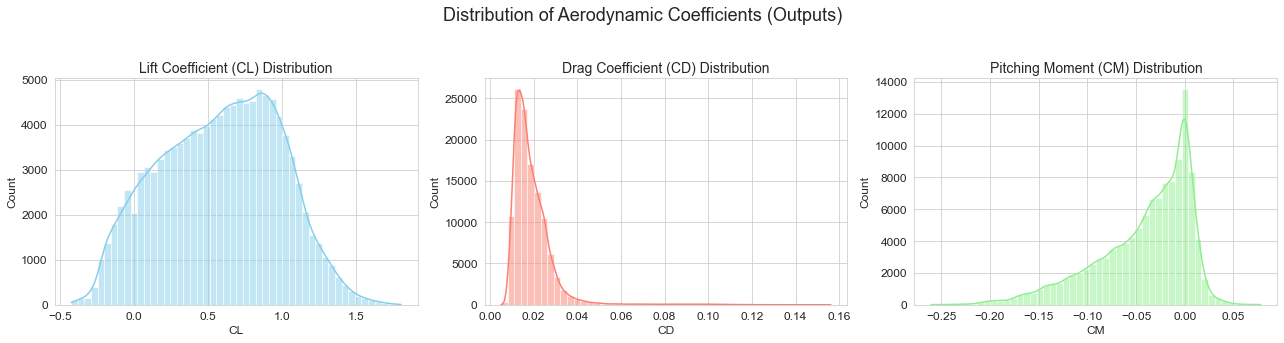

In [9]:
# Cell 5: Part 3 - Understanding the Output Space
# -----------------------------------------------
# Description:
# These plots visualize the range of aerodynamic performance (the outputs)
# that our model will be trained to predict. This helps frame the problem by
# showing the distribution of lift, drag, and pitching moment coefficients.

if df is not None:
    print("\n===================================================")
    print("=== Part 3: Understanding the Output Space ===")
    print("===================================================")
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Distribution of Aerodynamic Coefficients (Outputs)', fontsize=18)

    # CL Distribution
    sns.histplot(data=df, x='CL', bins=50, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title('Lift Coefficient (CL) Distribution', fontsize=14)
    axes[0].set_xlabel('CL')

    # CD Distribution
    sns.histplot(data=df, x='CD', bins=50, kde=True, ax=axes[1], color='salmon')
    axes[1].set_title('Drag Coefficient (CD) Distribution', fontsize=14)
    axes[1].set_xlabel('CD')

    # CM Distribution
    sns.histplot(data=df, x='CM', bins=50, kde=True, ax=axes[2], color='lightgreen')
    axes[2].set_title('Pitching Moment (CM) Distribution', fontsize=14)
    axes[2].set_xlabel('CM')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

else:
    print("DataFrame not loaded. Skipping Part 3.")


=== Part 4.1: Classic Aerodynamic Performance Curves ===
Plotting performance curves for sample airfoils: ['naca0917', 'naca13015', 'naca1520']


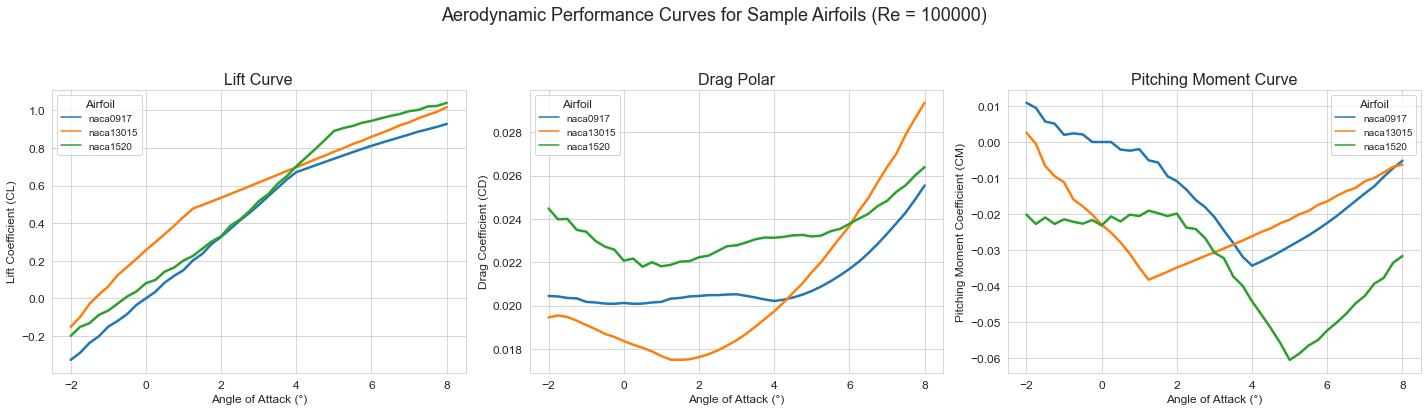

In [11]:
# Cell 6: Part 4.1 - The Classic Aerodynamic Curves
# ----------------------------------------------------
# Description:
# This is the most fundamental visualization in aerodynamics. We plot the lift, drag,
# and pitching moment curves for a few sample airfoils. This plot serves as a powerful
# visual confirmation that the dataset follows expected physical behavior (e.g.,
# linear lift slope, stall phenomenon, drag bucket), which builds confidence in the
# data's quality.

if df is not None:
    print("\n=======================================================")
    print("=== Part 4.1: Classic Aerodynamic Performance Curves ===")
    print("=======================================================")
    
    # Select a few sample airfoils to plot. Let's pick 3 unique ones.
    # To make it robust, we ensure we pick airfoils with enough data points.
    airfoil_counts = df['airfoil'].value_counts()
    sample_airfoils = airfoil_counts[airfoil_counts > 10].sample(min(3, len(airfoil_counts[airfoil_counts > 10]))).index.tolist()
    
    if sample_airfoils:
        print(f"Plotting performance curves for sample airfoils: {sample_airfoils}")

        # Filter the data for only these airfoils and a consistent Re if possible
        sample_df = df[df['airfoil'].isin(sample_airfoils) & (df['Re'] == df['Re'].min())]
        if sample_df.empty: # Fallback if no data at min Re for these airfoils
             sample_df = df[df['airfoil'].isin(sample_airfoils)]

        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        fig.suptitle(f'Aerodynamic Performance Curves for Sample Airfoils (Re = {sample_df["Re"].min():.0f})', fontsize=18)
        
        # Plotting
        sns.lineplot(data=sample_df, x='alpha', y='CL', hue='airfoil', ax=axes[0], lw=2.5)
        sns.lineplot(data=sample_df, x='alpha', y='CD', hue='airfoil', ax=axes[1], lw=2.5)
        sns.lineplot(data=sample_df, x='alpha', y='CM', hue='airfoil', ax=axes[2], lw=2.5)
        
        # Formatting
        axes[0].set_title('Lift Curve', fontsize=16)
        axes[0].set_xlabel('Angle of Attack (°)')
        axes[0].set_ylabel('Lift Coefficient (CL)')
        axes[0].grid(True, which='both')
        
        axes[1].set_title('Drag Polar', fontsize=16)
        axes[1].set_xlabel('Angle of Attack (°)')
        axes[1].set_ylabel('Drag Coefficient (CD)')
        axes[1].grid(True, which='both')
        
        axes[2].set_title('Pitching Moment Curve', fontsize=16)
        axes[2].set_xlabel('Angle of Attack (°)')
        axes[2].set_ylabel('Pitching Moment Coefficient (CM)')
        axes[2].grid(True, which='both')
        
        for ax in axes:
            ax.legend(title='Airfoil', fontsize='small')

        plt.tight_layout(rect=[0, 0.03, 1, 0.93])
        plt.show()
    else:
        print("Could not find enough sample airfoils with sufficient data to plot.")

else:
    print("DataFrame not loaded. Skipping Part 4.1.")


=== Part 4.2: Impact of Key Geometric Parameters on Aerodynamics ===

--- DIAGNOSTIC INFORMATION ---
Total data points: 117740
Unique alpha values: [-2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0]
Alpha range: -2.0 to 8.0
Data points with alpha between -0.1 and 0.1: 2893
Unique alpha values in this range: [0.0]
Data points with exactly alpha = 0.0: 2893

Camber range: 0.0056 to 0.0600
CL range for near-zero alpha: -0.1759 to 1.1004

Using exactly alpha = 0° data (2893 points)

--- APPLYING QUALITY FILTERS ---
Before quality filtering: 2893 points
After removing CL outliers (1st-99th percentile): 2835 points
CL range after filtering: -0.0548 to 0.8944

Correlation coefficient (camber vs CL): -0.7427

Plot 1: Camber effect using exactly 0°
Expected: POSITIVE correlation (more camber → more lift at zero Ao

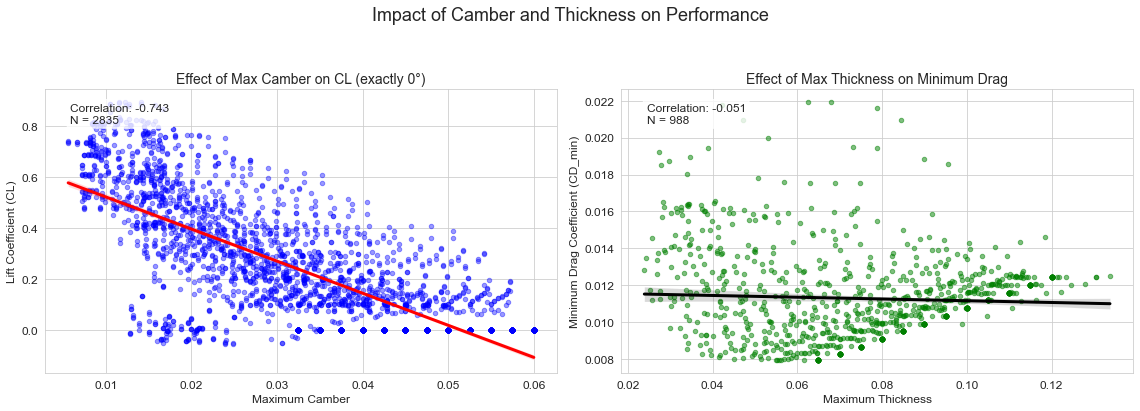


--- ADDITIONAL DIAGNOSTICS ---

Sample of filtered zero-alpha data:
                  airfoil  alpha  max_camber      CL       CD        Re
8    cst_nu6_nl6_te0p0000    0.0      0.0209 -0.0461  0.02417  100000.0
46   cst_nu6_nl6_te0p0000    0.0      0.0209 -0.0424  0.01767  200000.0
84   cst_nu6_nl6_te0p0000    0.0      0.0209 -0.0412  0.01445  300000.0
125  cst_nu6_nl6_te0p0001    0.0      0.0160 -0.0424  0.02740  100000.0
218  cst_nu6_nl6_te0p0002    0.0      0.0164 -0.0385  0.02862  100000.0
256  cst_nu6_nl6_te0p0002    0.0      0.0164 -0.0374  0.02082  200000.0
295  cst_nu6_nl6_te0p0002    0.0      0.0164 -0.0371  0.01638  300000.0
328  cst_nu6_nl6_te0p0003    0.0      0.0258  0.0862  0.02682  100000.0
367  cst_nu6_nl6_te0p0003    0.0      0.0258  0.0912  0.01892  200000.0
407  cst_nu6_nl6_te0p0003    0.0      0.0258  0.0940  0.01538  300000.0

Airfoils with near-zero camber (< 0.001): 0


In [14]:
# Cell 7: Part 4.2 - Impact of Key Geometric Parameters (IMPROVED WITH DIAGNOSTICS)
# --------------------------------------------------------
# Description:
# Here, we isolate the effect of specific geometric choices on aerodynamic performance.
# These scatter plots help to intuitively understand the trade-offs involved in
# airfoil design and confirm that the dataset captures these important trends.

if df is not None:
    print("\n=============================================================")
    print("=== Part 4.2: Impact of Key Geometric Parameters on Aerodynamics ===")
    print("=============================================================")
    
    # DIAGNOSTIC SECTION - Let's examine the data first
    print("\n--- DIAGNOSTIC INFORMATION ---")
    print(f"Total data points: {len(df)}")
    print(f"Unique alpha values: {sorted(df['alpha'].unique())}")
    print(f"Alpha range: {df['alpha'].min()} to {df['alpha'].max()}")
    
    # Check the original filtering
    df_zero_alpha_original = df[df['alpha'].between(-0.1, 0.1)]
    print(f"Data points with alpha between -0.1 and 0.1: {len(df_zero_alpha_original)}")
    print(f"Unique alpha values in this range: {sorted(df_zero_alpha_original['alpha'].unique())}")
    
    # Check for exactly zero
    df_exactly_zero = df[df['alpha'] == 0.0]
    print(f"Data points with exactly alpha = 0.0: {len(df_exactly_zero)}")
    
    # Let's also check the camber and CL ranges
    print(f"\nCamber range: {df['max_camber'].min():.4f} to {df['max_camber'].max():.4f}")
    print(f"CL range for near-zero alpha: {df_zero_alpha_original['CL'].min():.4f} to {df_zero_alpha_original['CL'].max():.4f}")
    
    # IMPROVED FILTERING APPROACH
    # Method 1: Use exactly zero if available, otherwise use closest to zero
    if len(df_exactly_zero) > 100:  # If we have enough data at exactly zero
        df_zero_alpha = df_exactly_zero
        alpha_method = "exactly 0°"
        print(f"\nUsing exactly alpha = 0° data ({len(df_zero_alpha)} points)")
    else:
        # Find the alpha value closest to zero
        closest_to_zero = df['alpha'].abs().min()
        closest_alpha_value = df.loc[df['alpha'].abs().idxmin(), 'alpha']
        df_zero_alpha = df[df['alpha'] == closest_alpha_value]
        alpha_method = f"closest to 0° (α = {closest_alpha_value}°)"
        print(f"\nUsing closest to zero: alpha = {closest_alpha_value}° ({len(df_zero_alpha)} points)")
    
    # Additional quality filters
    print("\n--- APPLYING QUALITY FILTERS ---")
    print(f"Before quality filtering: {len(df_zero_alpha)} points")
    
    # Remove extreme outliers in CL (likely convergence failures)
    cl_q01 = df_zero_alpha['CL'].quantile(0.01)
    cl_q99 = df_zero_alpha['CL'].quantile(0.99)
    df_zero_alpha_clean = df_zero_alpha[
        (df_zero_alpha['CL'] >= cl_q01) & 
        (df_zero_alpha['CL'] <= cl_q99)
    ]
    print(f"After removing CL outliers (1st-99th percentile): {len(df_zero_alpha_clean)} points")
    print(f"CL range after filtering: {df_zero_alpha_clean['CL'].min():.4f} to {df_zero_alpha_clean['CL'].max():.4f}")
    
    # Check correlation before plotting
    correlation = df_zero_alpha_clean['max_camber'].corr(df_zero_alpha_clean['CL'])
    print(f"\nCorrelation coefficient (camber vs CL): {correlation:.4f}")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Impact of Camber and Thickness on Performance', fontsize=18)

    # 1. Camber Effect on Zero-Alpha Lift
    print(f"\nPlot 1: Camber effect using {alpha_method}")
    print("Expected: POSITIVE correlation (more camber → more lift at zero AoA)")
    
    sns.regplot(data=df_zero_alpha_clean, x='max_camber', y='CL', ax=axes[0],
                scatter_kws={'alpha':0.4, 'color':'blue', 's':20}, 
                line_kws={'color':'red', 'lw':3})
    axes[0].set_title(f'Effect of Max Camber on CL ({alpha_method})', fontsize=14)
    axes[0].set_xlabel('Maximum Camber')
    axes[0].set_ylabel('Lift Coefficient (CL)')
    
    # Add correlation info to plot
    axes[0].text(0.05, 0.95, f'Correlation: {correlation:.3f}\nN = {len(df_zero_alpha_clean)}', 
                transform=axes[0].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # 2. Thickness Effect on Minimum Drag (IMPROVED)
    print("\nPlot 2: Thickness effect on minimum drag")
    
    # Better approach: find minimum CD for each airfoil, but ensure we have valid data
    print("Finding minimum drag for each airfoil...")
    df_min_drag = df.loc[df.groupby('airfoil')['CD'].idxmin()].copy()
    
    # Remove extreme outliers in CD
    cd_q01 = df_min_drag['CD'].quantile(0.01) 
    cd_q99 = df_min_drag['CD'].quantile(0.99)
    df_min_drag_clean = df_min_drag[
        (df_min_drag['CD'] >= cd_q01) & 
        (df_min_drag['CD'] <= cd_q99)
    ]
    
    print(f"Minimum drag data: {len(df_min_drag)} → {len(df_min_drag_clean)} after outlier removal")
    thickness_cd_correlation = df_min_drag_clean['max_thickness'].corr(df_min_drag_clean['CD'])
    print(f"Correlation coefficient (thickness vs min CD): {thickness_cd_correlation:.4f}")
    
    sns.regplot(data=df_min_drag_clean, x='max_thickness', y='CD', ax=axes[1],
                scatter_kws={'alpha':0.5, 'color':'green', 's':20}, 
                line_kws={'color':'black', 'lw':3})
    axes[1].set_title('Effect of Max Thickness on Minimum Drag', fontsize=14)
    axes[1].set_xlabel('Maximum Thickness')
    axes[1].set_ylabel('Minimum Drag Coefficient (CD_min)')
    
    # Add correlation info to plot
    axes[1].text(0.05, 0.95, f'Correlation: {thickness_cd_correlation:.3f}\nN = {len(df_min_drag_clean)}', 
                transform=axes[1].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()
    
    # ADDITIONAL DIAGNOSTIC PLOTS
    print("\n--- ADDITIONAL DIAGNOSTICS ---")
    
    # Show some sample data
    print("\nSample of filtered zero-alpha data:")
    sample_cols = ['airfoil', 'alpha', 'max_camber', 'CL', 'CD', 'Re']
    print(df_zero_alpha_clean[sample_cols].head(10).to_string())
    
    # Check if we have symmetric (zero camber) airfoils
    zero_camber_count = len(df_zero_alpha_clean[df_zero_alpha_clean['max_camber'] < 0.001])
    print(f"\nAirfoils with near-zero camber (< 0.001): {zero_camber_count}")
    if zero_camber_count > 0:
        zero_camber_cl_mean = df_zero_alpha_clean[df_zero_alpha_clean['max_camber'] < 0.001]['CL'].mean()
        print(f"Average CL for zero-camber airfoils: {zero_camber_cl_mean:.4f} (should be ≈ 0)")

else:
    print("DataFrame not loaded. Skipping Part 4.2.")


=== Part 4.3: Impact of Reynolds Number (Re) ===
Plotting CL vs. Alpha for airfoil 'cst_nu6_nl6_te0p0000' at different Reynolds numbers.


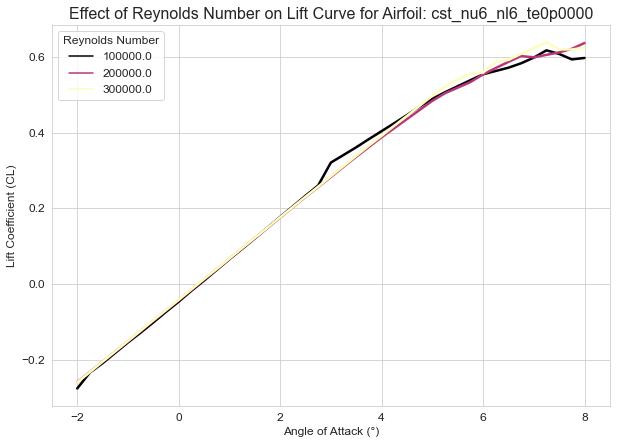

In [17]:
# Cell 8: Part 4.3 - Impact of Reynolds Number
# -----------------------------------------------
# Description:
# This plot isolates the effect of the Reynolds Number (Re) on the lift curve for a
# single airfoil. It's a critical visualization that shows how flow conditions can
# alter performance, particularly the maximum lift and stall behavior. This justifies
# including Re as a key input feature for the model.

if df is not None:
    print("\n===============================================")
    print("=== Part 4.3: Impact of Reynolds Number (Re) ===")
    print("===============================================")

    # Find an airfoil that has been simulated at multiple Reynolds numbers
    re_counts_per_airfoil = df.groupby('airfoil')['Re'].nunique()
    airfoil_multi_re = re_counts_per_airfoil[re_counts_per_airfoil > 1].index.tolist()

    if airfoil_multi_re:
        airfoil_to_plot = airfoil_multi_re[0] # Pick the first one for demonstration
        print(f"Plotting CL vs. Alpha for airfoil '{airfoil_to_plot}' at different Reynolds numbers.")
        
        df_re_effect = df[df['airfoil'] == airfoil_to_plot]

        plt.figure(figsize=(10, 7))
        sns.lineplot(data=df_re_effect, x='alpha', y='CL', hue='Re', palette='magma', lw=2.5)
        
        plt.title(f'Effect of Reynolds Number on Lift Curve for Airfoil: {airfoil_to_plot}', fontsize=16)
        plt.xlabel('Angle of Attack (°)')
        plt.ylabel('Lift Coefficient (CL)')
        plt.legend(title='Reynolds Number')
        plt.grid(True, which='both')
        plt.show()
    else:
        print("No single airfoil found with simulations at multiple Reynolds numbers in this dataset.")

else:
    print("DataFrame not loaded. Skipping Part 4.3.")


=== Part 5.1: Correlation Matrix Heatmap ===


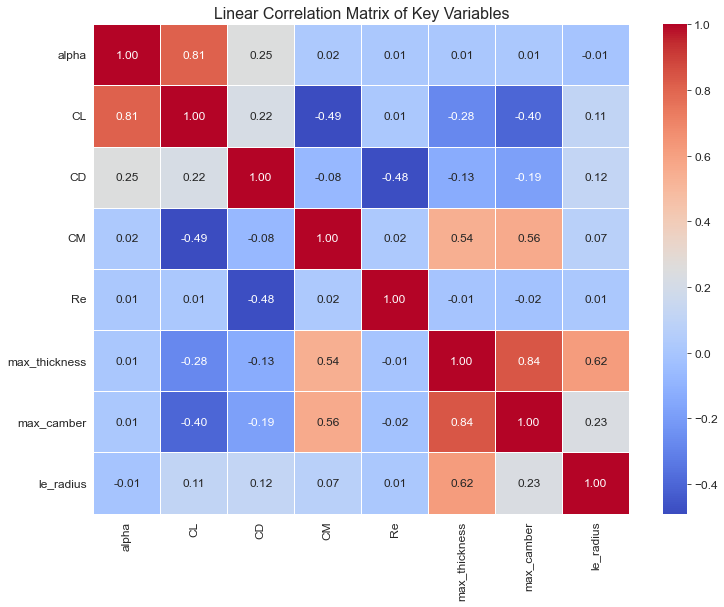


NOTE FOR REPORT: This heatmap is a valuable overview but only captures LINEAR relationships.
For example, while it shows a strong linear link between 'alpha' and 'CL', it cannot show
the non-linear stall behavior or the parabolic nature of the drag curve.


In [18]:
# Cell 9: Part 5.1 - Correlation Matrix Heatmap
# -----------------------------------------------
# Description:
# A correlation matrix provides a quick overview of the *linear* relationships between
# all numerical variables. The color-coded heatmap makes it easy to spot strong
# positive (red) or negative (blue) correlations. It's a standard tool in machine
# learning EDA to understand feature interactions and potential multicollinearity.
# IMPORTANT: This only shows linear trends; our problem is highly non-linear.

if df is not None:
    print("\n=================================================")
    print("=== Part 5.1: Correlation Matrix Heatmap ===")
    print("=================================================")

    # Select key numerical columns for the heatmap
    corr_cols = ['alpha', 'CL', 'CD', 'CM', 'Re', 'max_thickness', 'max_camber', 'le_radius']
    correlation_matrix = df[corr_cols].corr()

    plt.figure(figsize=(12, 9))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Linear Correlation Matrix of Key Variables', fontsize=16)
    plt.show()

    print("\nNOTE FOR REPORT: This heatmap is a valuable overview but only captures LINEAR relationships.")
    print("For example, while it shows a strong linear link between 'alpha' and 'CL', it cannot show")
    print("the non-linear stall behavior or the parabolic nature of the drag curve.")

else:
    print("DataFrame not loaded. Skipping Part 5.1.")


=== Part 5.2: Pair Plot for Key Variables ===
Generating a pair plot... This may take a moment.
This plot shows scatter plots for variable pairs and histograms on the diagonal.


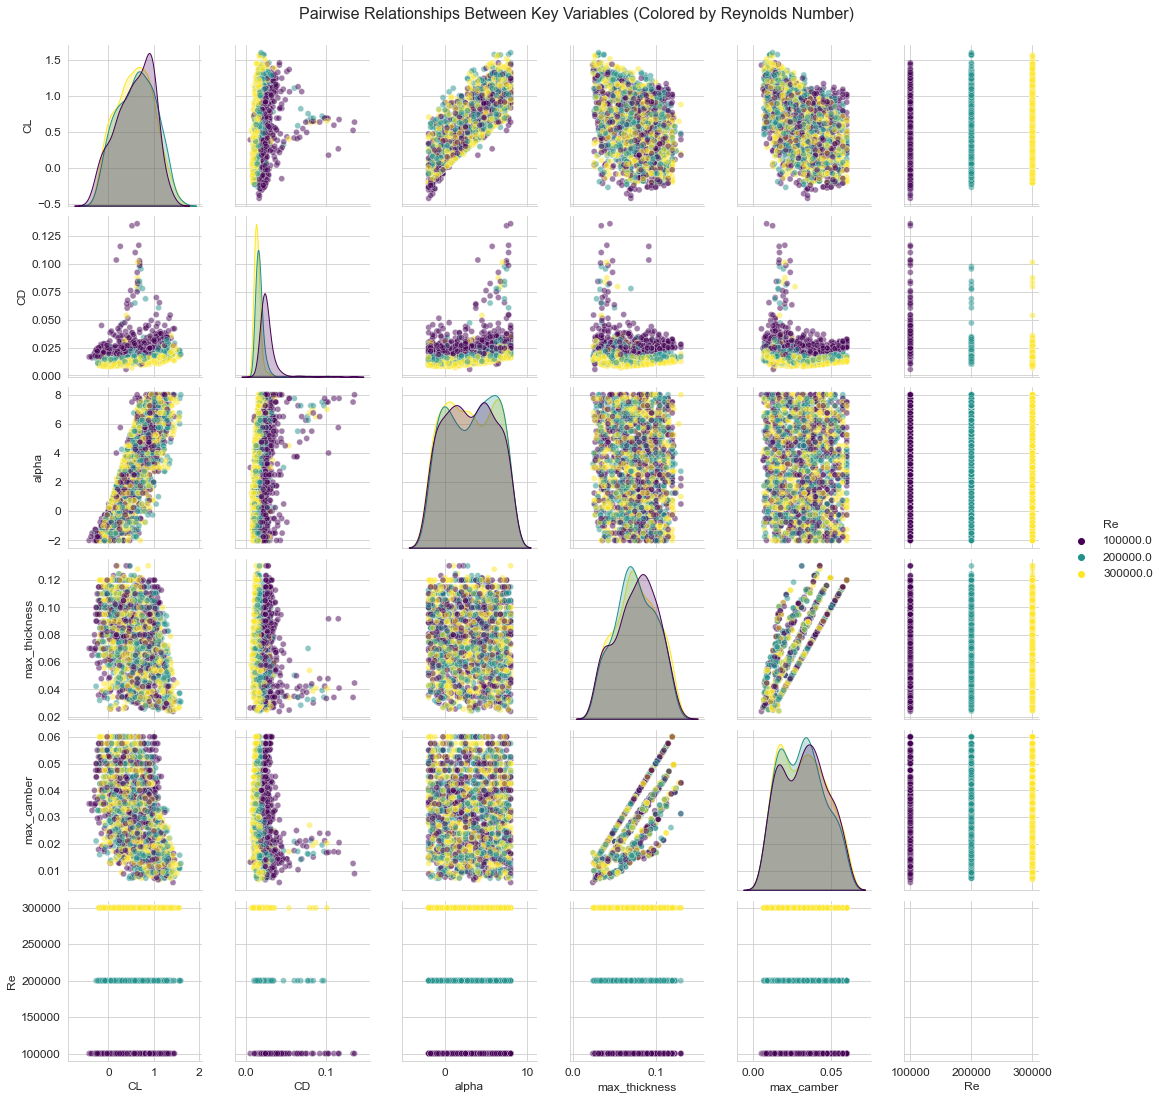

In [19]:
# Cell 10: Part 5.2 - Pair Plot for Key Variables
# -------------------------------------------------
# Description:
# A pair plot provides a powerful, dense visualization of relationships. It shows
# scatter plots for each pair of variables and the distribution of each variable on
# the diagonal. This can reveal non-linear trends, clusters, and interactions
# that a simple correlation matrix would miss. We select a subset of key features
# to keep the plot readable and insightful.

if df is not None:
    print("\n==============================================")
    print("=== Part 5.2: Pair Plot for Key Variables ===")
    print("==============================================")
    print("Generating a pair plot... This may take a moment.")
    print("This plot shows scatter plots for variable pairs and histograms on the diagonal.")

    # Select a subset of the most important columns for clarity
    pairplot_cols = ['CL', 'CD', 'alpha', 'max_thickness', 'max_camber', 'Re']

    # Use a smaller sample of the data for performance if the dataset is very large
    df_sample = df.sample(n=min(2000, len(df)))

    pair_plot = sns.pairplot(data=df_sample, vars=pairplot_cols, hue='Re', palette='viridis',
                             diag_kind='kde', plot_kws={'alpha': 0.5})
    pair_plot.fig.suptitle('Pairwise Relationships Between Key Variables (Colored by Reynolds Number)', y=1.02, fontsize=16)
    plt.show()

else:
    print("DataFrame not loaded. Skipping Part 5.2.")